# Step Detection 


For this project,  three samples of walking under different circumstances of phone placement are examined. They include, (1) phone in hand (2) phone in pocket and (3) phone in bag. These accelerometer readings provide x, y, and z axis values to represent the position of the phone at any time. 

In [1]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

colnames = ['Time','x','y','z'] 

phone_in_hand = pd.read_csv('acce_hand.csv', names=colnames)
phone_in_pocket = pd.read_csv('acce_pocket.csv', names=colnames)
phone_in_bag = pd.read_csv('acce_bag.csv', names=colnames)

## Data Processing 

The axis (raw) signals are compressed into one signal by computing the magnitude to eliminate the impact of orientation. The time stamps provided in the accelerometer data are re-formatted w.r.t the start time (given in nanoseconds) 

In [259]:
def dataprocessing(df):
    """
    Function to find the magnitude of the X, Y and Z axes and reformat the time data 
    
    """
    df['magnitude'] = np.sqrt(np.square(df.iloc[:,1:]).sum(axis=1))
    df['Time'] = df['Time'].apply(lambda x: (x-df.iloc[0,0])*10**(-9))
    
    return df

In [260]:
phone_in_hand = dataprocessing(phone_in_hand)

In [261]:
phone_in_pocket = dataprocessing(phone_in_pocket)

In [262]:
phone_in_bag = dataprocessing(phone_in_bag)

### Sample Rate for each case

In [80]:
sampleRate1 = len(phone_in_hand)/30
sampleRate1

405.26666666666665

In [81]:
sampleRate2 = len(phone_in_pocket)/37
sampleRate2

410.64864864864865

In [82]:
sampleRate3 = len(phone_in_bag)/42
sampleRate3

407.54761904761904

The tuned Sampling Rate is assumed to be an average of the three samples

In [86]:
samplingRate = (sampleRate1 + sampleRate2 + sampleRate3)/3
samplingRate

407.82097812097817

## Visualizing the Raw Signals

<Figure size 1080x216 with 0 Axes>

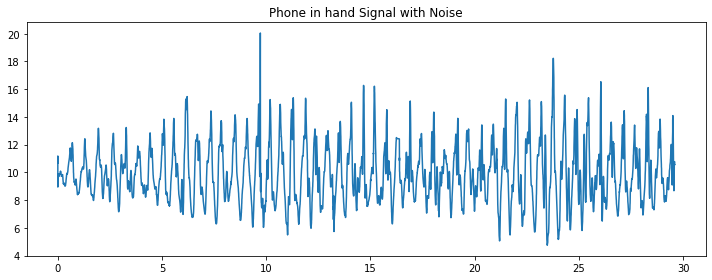

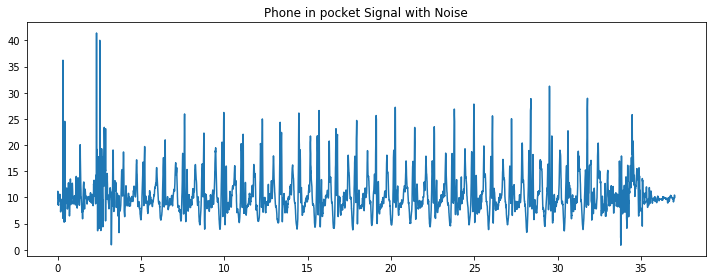

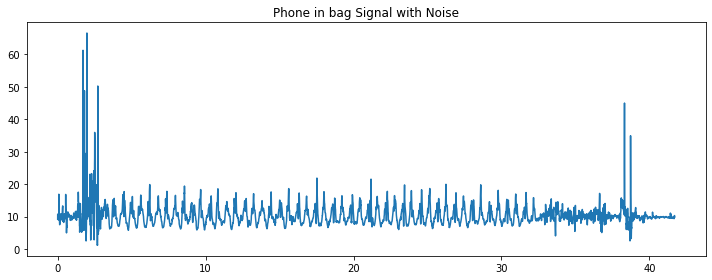

In [91]:
plt.figure(figsize=(15, 3))

#plt.subplot(111)
plt.figure(figsize=(10, 4))
plt.plot(phone_in_hand['Time'], phone_in_hand['magnitude'])
plt.title("Phone in hand Signal with Noise")
#plt.margins(0, .05)
plt.tight_layout()
plt.show()

#plt.subplot(121)
plt.figure(figsize=(10, 4))
plt.plot(phone_in_pocket['Time'], phone_in_pocket['magnitude'])
plt.title("Phone in pocket Signal with Noise")
#plt.margins(0, .05)
plt.tight_layout()
plt.show()

#plt.subplot(131)
plt.figure(figsize=(10, 4))
plt.plot(phone_in_bag['Time'], phone_in_bag['magnitude'])
plt.title("Phone in bag Signal with Noise")
#plt.margins(0, .05)
plt.tight_layout()
plt.show()

The phone in hand signal appears to produce the most stable and discernible peaks with the least noise. For the in-bag and in-pocket cases we observe high peaks in the start of the recording which possibly indicates the movement to adjust the phone in place. Following the inital high peaks, more consistent highs and lows are observed. The amplitude of movement is very high for the latter two cases, which is why more low frequency readings are recorded. Based on these observations a low frequency filter would work well with these samples

## Low Pass Filter

The function below assumes a fixed order of 3 while the cutoff frequency varies. 

In [269]:
def lowpass(signal, order = 3, cutoff = cutoff):
    # Design lowpass filter.
    # Args:
    #     - cutoff (float) : the cutoff frequency of the filter.
    #     - fs     (float) : the sampling rate.
    #     - order    (int) : order of the filter, by default defined to 3.

    # set sample rate to 1kHz
    # sampling_rate = 1000

    # calculate the Nyquist frequency
    nyq = 0.5 * samplingRate

    # set order of the filter
    order = 3

    # set cutoff frequency for lowpass filter
    cutoff = cutoff #Hz

    # design filter
    low = cutoff / nyq
    b, a = scipy.signal.butter(order, low, btype='low')

    # apply the lowpass filter to the data
    filtered = scipy.signal.filtfilt(b, a, signal['magnitude'])
    
    return filtered

## Raw data vs Filtered data

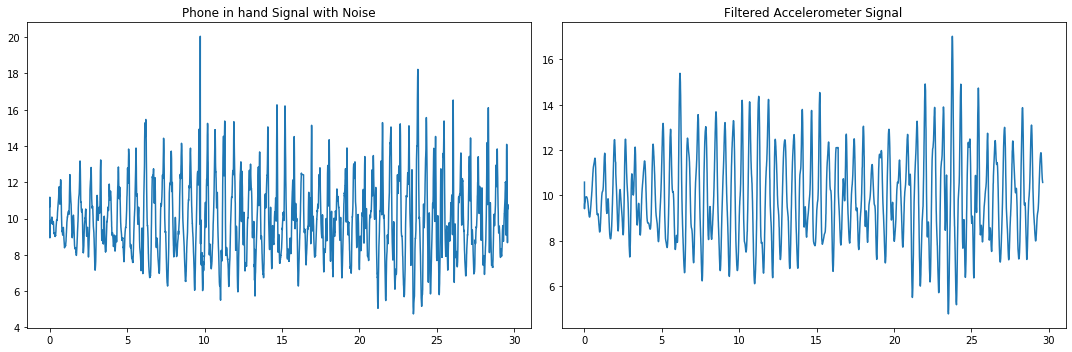

In [154]:
# plot the original data next to the filtered data

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(phone_in_hand['Time'], phone_in_hand['magnitude'])
plt.title("Phone in hand Signal with Noise")
#plt.margins(0, .05)

plt.subplot(122)
plt.plot(phone_in_hand['Time'], lowpass(phone_in_hand, 6))
plt.title("Filtered Accelerometer Signal")
#plt.margins(0, .05)

plt.tight_layout()
plt.show()

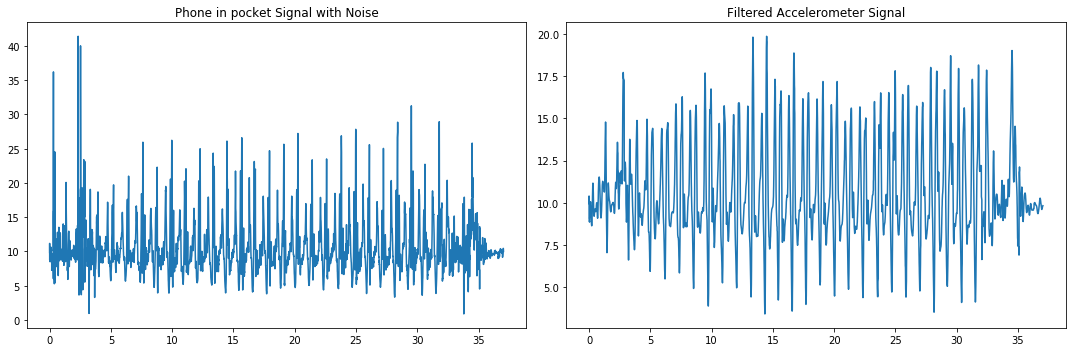

In [155]:
# plot the original data next to the filtered data

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(phone_in_pocket['Time'], phone_in_pocket['magnitude'])
plt.title("Phone in pocket Signal with Noise")
#plt.margins(0, .05)

plt.subplot(122)
plt.plot(phone_in_pocket['Time'], lowpass(phone_in_pocket, 6))
plt.title("Filtered Accelerometer Signal")
#plt.margins(0, .05)

plt.tight_layout()
plt.show()

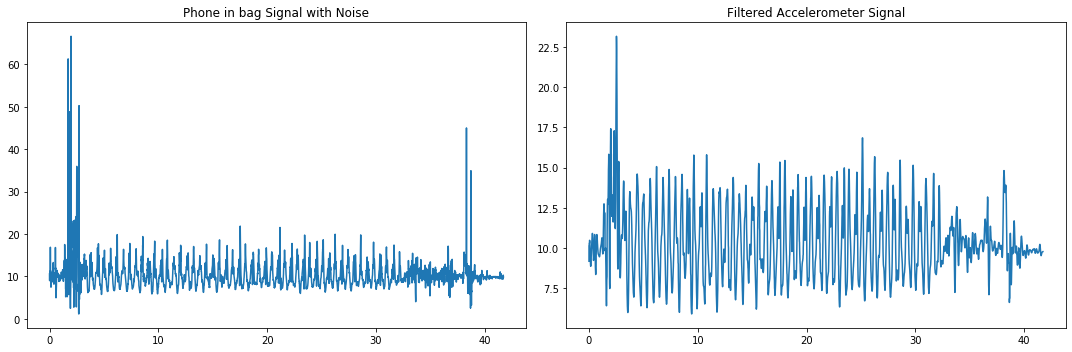

In [156]:
# plot the original data next to the filtered data

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(phone_in_bag['Time'], phone_in_bag['magnitude'])
plt.title("Phone in bag Signal with Noise")
#plt.margins(0, .05)

plt.subplot(122)
plt.plot(phone_in_bag['Time'], lowpass(phone_in_bag, 6))
plt.title("Filtered Accelerometer Signal")
#plt.margins(0, .05)

plt.tight_layout()
plt.show()

A value of 6 Hz was chosen as the cutoff value for the low pass filter. This allowed us to eliminate the initial high peaks observed as distrubance and mitigate the impact of very low frequency peaks. 

## Testing cutoff frequency values 

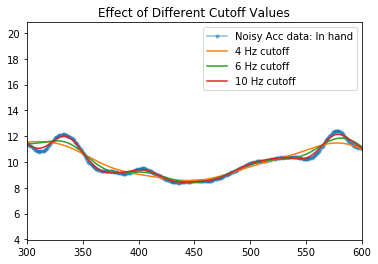

In [270]:
plt.plot(phone_in_hand['magnitude'], '.-', alpha=.5, label="Noisy Acc data: In hand")

for cutoff in [.02, .03, .05]:
    b, a = scipy.signal.butter(3, cutoff) # order = 3
    filtered = scipy.signal.filtfilt(b, a, phone_in_hand['magnitude'])
    label = f"{int(cutoff*0.5*samplingRate):d} Hz cutoff"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([300, 600, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

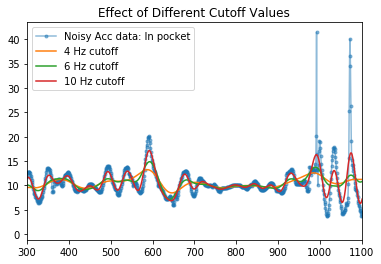

In [264]:
plt.plot(phone_in_pocket['magnitude'], '.-', alpha=.5, label="Noisy Acc data: In pocket")

for cutoff in [.02, .03, .05]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, phone_in_pocket['magnitude'])
    label = f"{int(cutoff*0.5*samplingRate):d} Hz cutoff"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([300, 1100, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

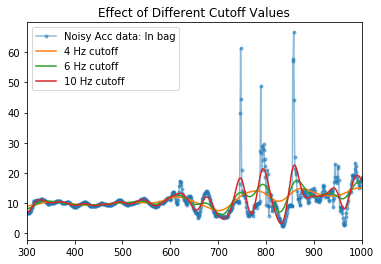

In [143]:
plt.plot(phone_in_bag['magnitude'], '.-', alpha=.5, label="Noisy Acc data: In bag")

for cutoff in [.02, .03, .05]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, phone_in_bag['magnitude'])
    label = f"{int(cutoff*0.5*samplingRate):d} Hz cutoff"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([300, 1000, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

While choosing a cutoff of 10 Hz would be sufficient to eliminate outliers as very high peaks, this value passes noise from lower freqencies. At 4 Hz, the signal is too smooth and does not capture the peaks. At 6 Hz we can see that the peaks are captured and the impact of the very low frequency noise is eliminated. 

In [265]:
cutoff = 6

### Testing for Bandpass vs Lowpass filter

In [271]:
b, a = scipy.signal.butter(3, 0.03, 'lowpass') # order = 3
filteredLowPass = scipy.signal.filtfilt(b, a, phone_in_hand['magnitude'])

b, a = scipy.signal.butter(3, [.01, .03], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, phone_in_hand['magnitude'])

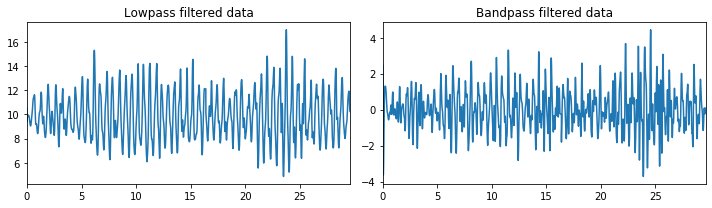

In [272]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(phone_in_hand['Time'], filteredLowPass)
plt.title("Lowpass filtered data")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(phone_in_hand['Time'], filteredBandPass)
plt.title("Bandpass filtered data")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

It is clear, from the comparison above, that low pass filters would work better for the walking samples 

## Step Detection

Algorithm for detecting local maximas and minmias in a signal. Discovers peaks by searching for values which are surrounded by lower or larger values for maximas and minimas respectively

In [273]:
def peakdetect(y_axis, x_axis = None, lookahead = 100, delta = 0):
    """ 
    keyword arguments:
    y_axis -- A list containg the signal over which to find peaks
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the peaks. 
    lookahead -- (optional) distance to look ahead from a peak candidate to
        determine if it is the actual peak (default: 100) 
    delta -- (optional) this specifies a minimum difference between a peak and
        the points following it, before a peak may be considered a peak. 
    
    return -- two lists [maxtab, mintab] containing the positive and negative
        peaks respectively. Each cell of the lists contains a tupple of:
        (position, peak_value) 
    """
    maxtab = []
    mintab = []
    dump = []   #Used to pop the first hit which always if false
       
    length = len(y_axis)
    if x_axis is None:
        x_axis = range(length)
    
    if length != len(x_axis):
        raise ValueError('Input vectors y_axis and x_axis must have same length')
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    #maxima and minima candidates are temporarily stored in
    #mx and mn respectively
    mn, mx = np.Inf, -np.Inf
    
    #Only detect peak if there is 'lookahead' amount of points after it
    for index, (x, y) in enumerate(zip(x_axis[:-lookahead], y_axis[:-lookahead])):
        if y > mx:
            mx = y
            mxpos = x
        if y < mn:
            mn = y
            mnpos = x
        
        ####look for max####
        if y < mx-delta and mx != np.Inf:
            #Maxima peak candidate found
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].max() < mx:
                maxtab.append((mxpos, mx))
                dump.append(True)
                #set algorithm to only find minima now
                mx = np.Inf
                mn = np.Inf
                if index+lookahead >= length:
                    #end is within lookahead no more peaks can be found
                    break
                continue
            #else:  #slows shit down this does
            #    mx = ahead
            #    mxpos = x_axis[np.where(y_axis[index:index+lookahead]==mx)]
        
        ####look for min####
        if y > mn+delta and mn != -np.Inf:
            #Minima peak candidate found 
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].min() > mn:
                mintab.append((mnpos, mn))
                dump.append(False)
                #set algorithm to only find maxima now
                mn = -np.Inf
                mx = -np.Inf
                if index+lookahead >= length:
                    #end is within lookahead no more peaks can be found
                    break
            #else:  #slows shit down this does
            #    mn = ahead
            #    mnpos = x_axis[np.where(y_axis[index:index+lookahead]==mn)]
    
    
    #Remove the false hit on the first value of the y_axis
    if dump[0]:
        maxtab.pop(0)
        #print "pop max"
    else:
        mintab.pop(0)
        #print "pop min"
    del dump
    
    return maxtab, mintab

In [254]:
len(peakdetect(lowpass(phone_in_hand, cutoff), lookahead = 180)[0])

46

In [255]:
len(peakdetect(lowpass(phone_in_pocket, cutoff), lookahead = 180)[0])

52

In [253]:
len(peakdetect(lowpass(phone_in_bag, cutoff), lookahead = 180)[0])

55

## Impact of Lookahead selection on Step Detection 

Lookahead is the distance to *look ahead* from a peak candidate to determine if it is the actual peak. The range of values tested are selected based on the sampling rate and frequency of peaks. Since the samples do not have instances of high amplitude, the peak frequencies observed are low as well. This is why smaller windows of lookahead values have been chosen.

In [177]:
def check_lookahead(df):
    
    steps = []
    
    for lookahead in [20,50,100,200,300,400,500]:
        steps.append(len(peakdetect(lowpass(df, cutoff), lookahead = lookahead)[0]))
    
    plt.plot([20, 50,100,200,300,400,500], steps, marker = 'o')

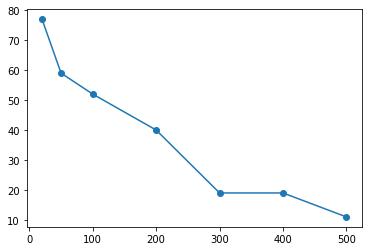

In [178]:
check_lookahead(phone_in_hand)

Actual step count for the phone in hand scenario as detected by the built-in system is 45 which is achieved with a lookahead of approximately **190** data points. 

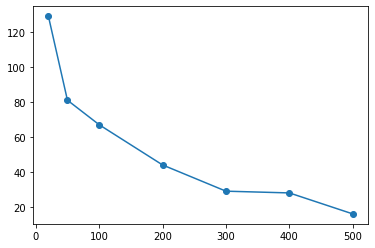

In [179]:
check_lookahead(phone_in_pocket)

Actual step count for the phone in pocket scenario is 56 which is achieved with a lookahead of approximately **170** data points. 

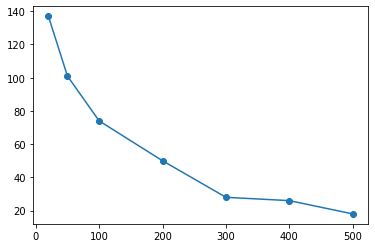

In [180]:
check_lookahead(phone_in_bag)

Actual step count for the phone in bag scenario is 57 which is achieved with a lookahead of approximately **180** data points.

## Summary of Accuracy 

Based on the findings above, we observe that selecting a lookahead value of **180** averages out for all samples. This value allows the peak detection algorithm to achieve the highest accuracy for the phone in hand case. The highest error is observed for the phone in pocket case (Actual Step Count - 56, Algorithm - 52)  

## Workflow of Algorithm 

**Raw signal -> Data processing -> Low pass filter -> Step Detection**